In [59]:
# !pip install geopandas

/var/folders/rv/s_sjgqd50c1_4x8dzqq8cq2w0000gn/T/ipykernel_54296/4285896319.py:71: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['centroid'] = us_states.geometry.centroid
/var/folders/rv/s_sjgqd50c1_4x8dzqq8cq2w0000gn/T/ipykernel_54296/4285896319.py:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(us_states.centroid.x, us_states.centroid.y, us_states['name']):
/var/folders/rv/s_sjgqd50c1_4x8dzqq8cq2w0000gn/T/ipykernel_54296/4285896319.py:71: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['centroid'] = us_states.geometry.centroid

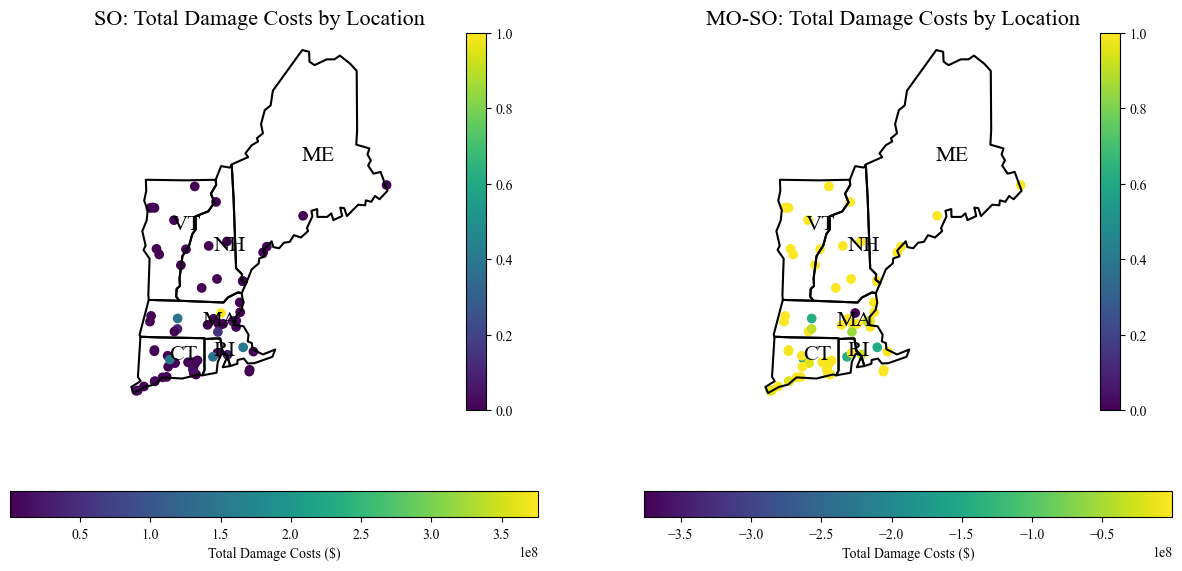

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set matplotlib to use Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'


import os
dir_base = "/Users/skhanal/Globus_local/MOTEP-OSW/outputs/Final Files/ISONE/SO"
dir_delta = "/Users/skhanal/Globus_local/MOTEP-OSW/outputs/Final Files/ISONE/MO-SO"

#

# Load the CSV data into a DataFrame
total_damages = pd.read_csv(os.path.join(dir_base, 'Pg_aq.csv'))
total_damages_diff = pd.read_csv(os.path.join(dir_delta, 'Pg_aq.csv'))

def create_plot(gdf, title, ax):
    # Plot data points with size proportional to damage_type
    gdf.plot(column='aq_costs', ax=ax, legend=True, legend_kwds={'label': 'Total Damage Costs ($)', 'orientation': 'horizontal'})

    # Set title and labels
    ax.set_title(title, fontsize=16)

    # Remove axis
    ax.axis('off')

# Convert our data to GeoDataFrame
gdf = gpd.GeoDataFrame(total_damages, geometry=gpd.points_from_xy(total_damages.longitude, total_damages.latitude))
gdf_diff = gpd.GeoDataFrame(total_damages_diff, geometry=gpd.points_from_xy(total_damages_diff.longitude, total_damages_diff.latitude))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# # Fetch map boundaries and state names using Natural Earth dataset
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# us_states = world[world['iso_a3'] == 'USA']

# Convert our data to GeoDataFrame
gdf = gpd.GeoDataFrame(total_damages, geometry=gpd.points_from_xy(total_damages.longitude, total_damages.latitude))
gdf_diff = gpd.GeoDataFrame(total_damages_diff, geometry=gpd.points_from_xy(total_damages_diff.longitude, total_damages_diff.latitude))

# Load US States geometry
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter for ISO-NE states
iso_ne_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
us_states = us_states[us_states['name'].isin(iso_ne_states)]

# Shorten state names
state_abbreviations = {'Connecticut': 'CT', 'Maine': 'ME', 'Massachusetts': 'MA', 'New Hampshire': 'NH', 'Rhode Island': 'RI', 'Vermont': 'VT'}
us_states['name'] = us_states['name'].map(state_abbreviations)

# Convert the CRS of us_states to match the CRS of our data
us_states = us_states.to_crs('EPSG:4326')

# Create the plot for base case
create_plot(gdf, f"{os.path.basename(dir_base)}: Total Damage Costs by Location", axes[0])

# Create the plot for delta case
create_plot(gdf_diff, f"{os.path.basename(dir_delta)}: Total Damage Costs by Location", axes[1])

# Add map boundaries to each subplot
for ax in axes:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    us_states.boundary.plot(ax=ax, color='black')
    us_states['centroid'] = us_states.geometry.centroid
    for x, y, label in zip(us_states.centroid.x, us_states.centroid.y, us_states['name']):
        ax.text(x, y, label, fontsize=16)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap='viridis'), cax=cax, orientation='vertical')

# Save the plots
plt.savefig(f"{os.path.basename(dir_base)} and {os.path.basename(dir_delta)} aq costs.pdf", dpi=300)

# Show the plots
plt.show()


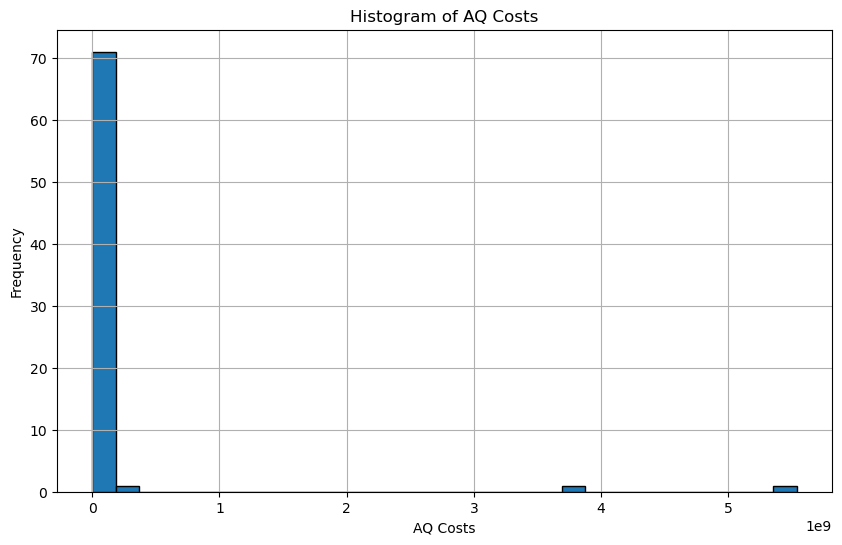

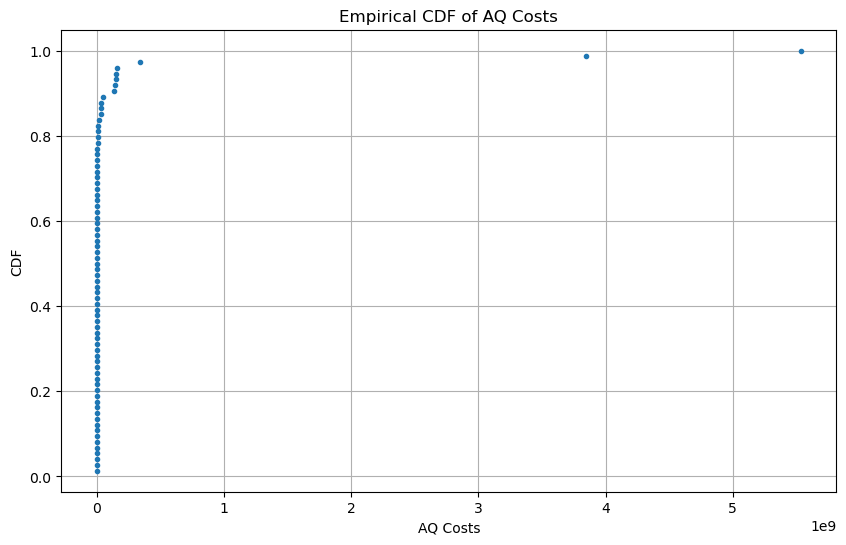

In [3]:
df = total_damages
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['aq_costs'], bins=30, edgecolor='black')
plt.title('Histogram of AQ Costs')
plt.xlabel('AQ Costs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Empirical CDF
plt.figure(figsize=(10, 6))
x = np.sort(df['aq_costs'])
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical CDF of AQ Costs')
plt.xlabel('AQ Costs')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

In [4]:
!pip install folium

In [5]:
import folium
from folium.plugins import HeatMap

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file path

# Create a map centered around an average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Create a HeatMap layer
heat_data = [[row['latitude'], row['longitude'], row['aq_costs']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map

In [80]:
# !pip install contextily


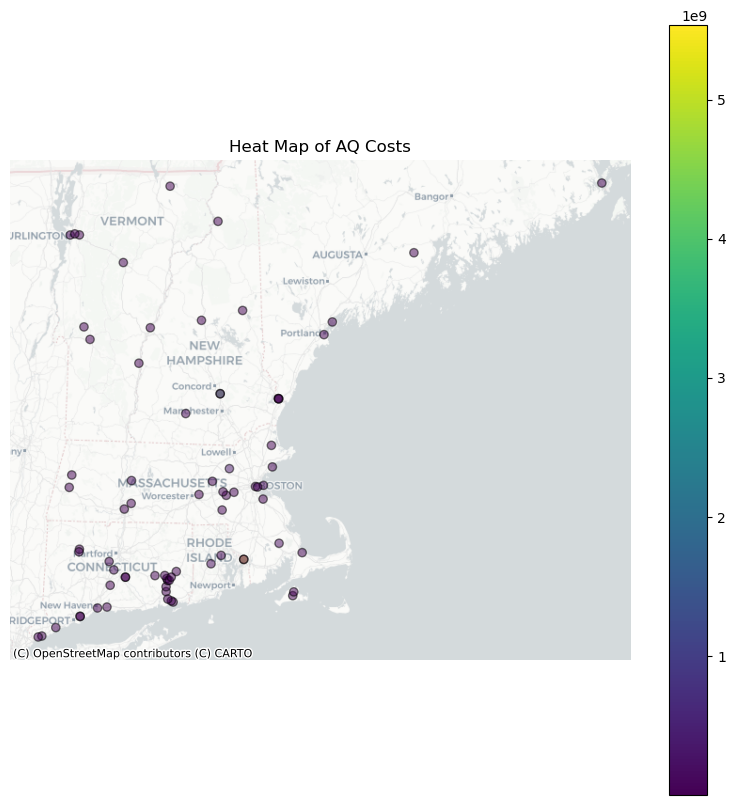

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file path

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate system to WGS84 (lat/long)
gdf.crs = 'EPSG:4326'

# Convert to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='aq_costs', cmap='viridis', alpha=0.5, edgecolor='k', legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adjust axes
ax.set_axis_off()
plt.title('Heat Map of AQ Costs')

# Save to file
# plt.savefig('/mnt/data/geo_heat_map.png', format='png', dpi=300)

plt.show()


In [7]:
df = total_damages
import folium
from folium.plugins import HeatMap

# Assuming df is your pre-filtered DataFrame for New England region

# Create a map centered around an average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Create a HeatMap layer
heat_data = [[row['latitude'], row['longitude'], row['aq_costs']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

# Save the map as an HTML file
# map.save('/mnt/data/heat_map_new_england.html')

map

In [8]:
df = total_damages_diff
import folium
from folium.plugins import HeatMap

# Assuming df is your pre-filtered DataFrame for New England region

# Create a map centered around an average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Create a HeatMap layer
heat_data = [[row['latitude'], row['longitude'], row['aq_costs']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

# Save the map as an HTML file
# map.save('/mnt/data/heat_map_new_england.html')

map